In [22]:
import pandas as pd
data = data = pd.read_csv("data.csv")
print(data.head())
print(data.info())

   Unnamed: 0  location  country  gender   age  vis_wuhan  from_wuhan  \
0           0       104        8       1  66.0          1           0   
1           1       101        8       0  56.0          0           1   
2           2       137        8       1  46.0          0           1   
3           3       116        8       0  60.0          1           0   
4           4       116        8       1  58.0          0           0   

   symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  \
0        14        31        19        12         3         1             8   
1        14        31        19        12         3         1             0   
2        14        31        19        12         3         1            13   
3        14        31        19        12         3         1             0   
4        14        31        19        12         3         1             0   

   result  
0       1  
1       0  
2       0  
3       0  
4       0  
<class 'pandas

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split
X = data.drop('result', axis=1)
y = data['result']
# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
len(X_train)

604

In [26]:
len(X_val)

259

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)



GaussianNB()

Here is the model scoer

In [28]:
nb_model.score(X_val,y_val)

0.7837837837837838

In [29]:
X_val[0:10]

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
715,715,45,13,1,51.0,0,0,6,31,19,12,3,1,7
605,605,12,12,1,33.0,0,0,14,31,19,12,3,1,0
120,120,99,8,0,70.0,0,1,14,31,19,12,3,1,0
208,208,22,18,1,45.0,0,1,14,31,19,12,3,1,3
380,380,106,23,0,79.0,0,0,14,31,19,12,3,1,15
817,817,91,15,2,49.4,0,0,14,31,19,12,3,1,0
575,575,127,33,1,50.0,0,0,23,31,19,12,3,1,0
266,266,59,18,1,55.0,0,0,2,12,19,12,3,1,1
557,557,74,32,1,25.0,1,0,14,31,19,12,3,1,0
826,826,111,15,2,49.4,0,0,14,31,19,12,3,1,0


In [30]:
y_val[0:10]

715    0
605    0
120    1
208    0
380    1
817    0
575    0
266    0
557    0
826    0
Name: result, dtype: int64

Here is the model results on the first 10 examples from test set

In [31]:
nb_model.predict(X_val[0:10])

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       227
           1       0.35      0.91      0.51        32

    accuracy                           0.78       259
   macro avg       0.67      0.84      0.69       259
weighted avg       0.91      0.78      0.82       259



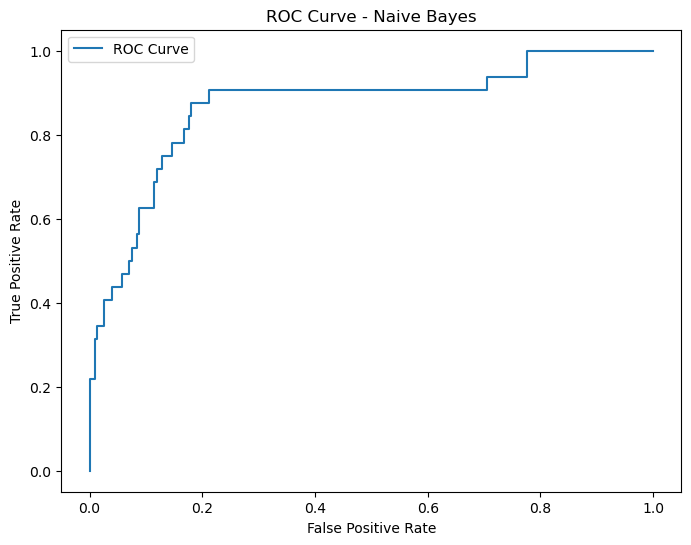

In [32]:
y_pred = nb_model.predict(X_val)

# Evaluate performance
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_val, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_val, nb_model.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()